# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Import libraries to build linear model for statistical analysis and prediction
# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # To split the data into training and test set

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from scipy import stats

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
#Loading the dataset
EL_data= pd.read_csv("/content/ExtraaLearn.csv", sep=",")
df = EL_data.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
#Getting Data shape
df.shape

(4612, 15)

In [4]:
#Taking a look to the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
#Checking how many missing values are there.
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [7]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
#Checking unique values in each column
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


Observations:
- The dataset contains 4,612 observations and 15 columns.
- **No missing values are present** — all columns have 4,612 non-null entries, nor duplicated values
- There are **three data types**:int64, float64 and object.
- Only **one column is of type** float64 :page_views_per_visit.
- There are **4 integer (int64) and 10 categorical (object) columns**.
- Among the object columns: print_media_type1, print_media_type2, digital_media, educational_channels and referral are binary. These will be converted to 1 for "Yes" and 0 for "No", and their data type will be changed to int64.
- The column  ID is a unique identifier for each lead and does not contribute to the analysis. It will be dropped.
- Status , the dependent variable is also a numerical binary variable, which confirms we will require a classification model.


In [9]:
#droping ID column
df.drop('ID', axis=1, inplace=True)

In [10]:
#checking df is ok after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [11]:
#Confirming everything looks fine after dropping ID
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Univariate Analysis

In [12]:
#Checking summary statistics
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,4612,2,No,4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- The age of customers ranges from 18 to 63 years, with an average age of 51, indicating a relatively mature target audience.

- 56% of customers are professionals, suggesting that the marketing efforts may be effectively reaching a career-oriented demographic.

- 55% of users had their first interaction through the website, highlighting the importance of optimizing the website for lead generation.

- 49% of profiles are 75–100% complete, which shows moderate engagement. Encouraging users to fully complete their profiles could help with better lead qualification.

- Website visits range from 0 to 30, with an average of 3 visits per user, suggesting a significant portion of leads have low or no engagement on the website. This may be an opportunity to implement retargeting strategies.

- 49% of the last recorded activities were email-related, which suggests that nearly half of the leads were actively seeking more information via email, emphasizing the importance of effective email campaigns.

- The data reveals that most customers have not seen or heard about ExtraLearn through any advertising channels — including print media (newspapers, magazines), digital platforms, or educational channels — nor have they been referred by others.

 This suggests that current marketing strategies are either underperforming or lacking in reach and visibility. It is crucial to reassess and optimize the media mix, content placement, and targeting approach to ensure that campaigns effectively connect with the intended audience.


### Numerical Univariate Analyis

In [13]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(8, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

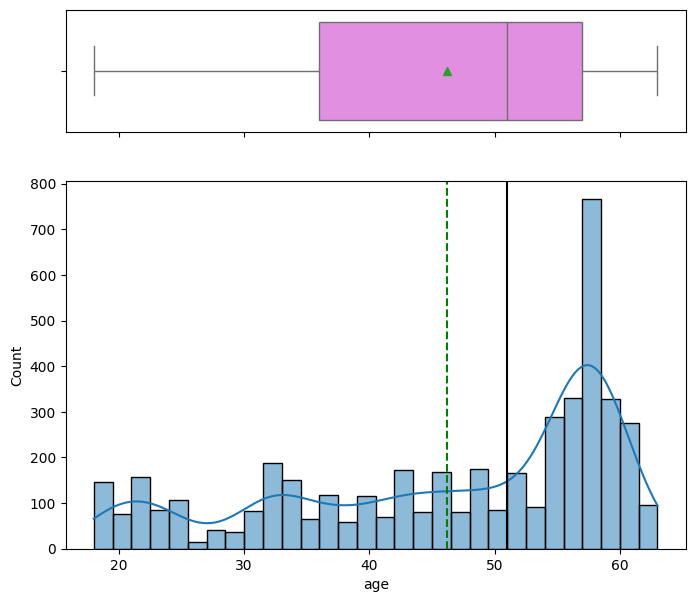

In [14]:
histogram_boxplot(df, "age", kde = True, bins = 30)

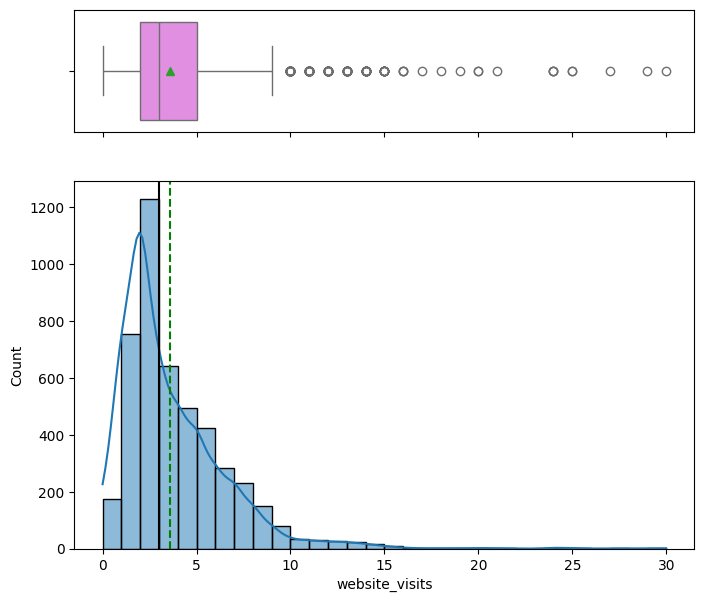

In [15]:
histogram_boxplot(df, "website_visits", kde = True, bins = 30)

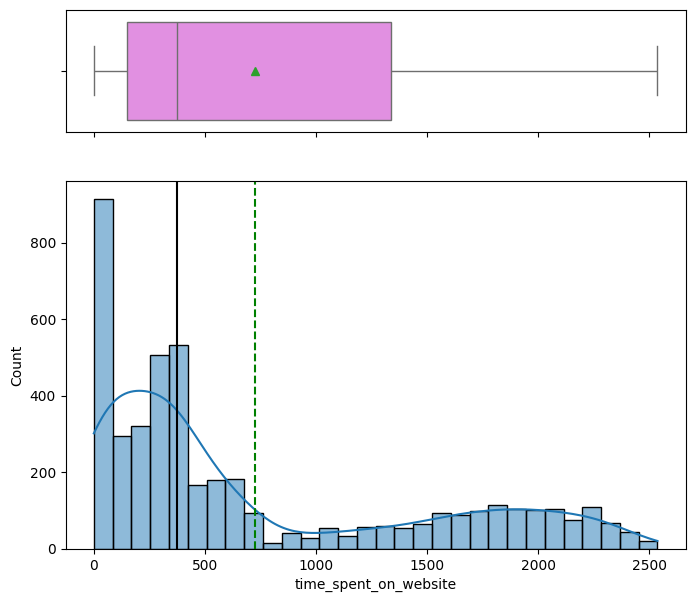

In [16]:
histogram_boxplot(df, "time_spent_on_website", kde = True, bins = 30)

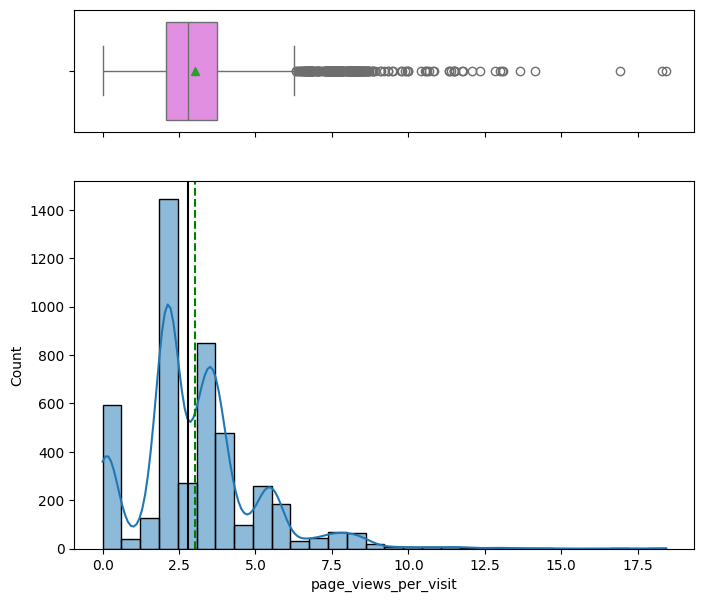

In [17]:
histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 30)

Obervations:
- The age distribution is slightly left-skewed, with a higher concentration of customers between the ages of 53 and 62.

- The histogram supports the summary statistics, showing a right-skewed distribution of website visits. On average, users visit the site 3 times, though some outliers have up to 30 visits.

- The time spent on the website is also right-skewed, with an average of 12 minutes. However, 50% of users spend only 0 to 3 minutes, suggesting a need for improved engagement strategies to encourage longer visit durations.

- The histogram aligns with the summary statistics, revealing a right-skewed distribution of page views per visit. On average, users view 3 pages per visit, with some outliers reaching up to 18 pages viewed.

- Outliers reflect real user behaviors and represent extreme cases that are important for business analysis. Therefore, they will not be removed or transformed.

### Categorical Univariate Analysis

In [18]:
#Creating categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols.nunique()

9

In [19]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

print(df["status"].value_counts(normalize=True))

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

Obervations:
- Professionals represent 56.7% of the customer occupations.

- 55% of users had their first interaction via the website.

- 49% of profiles were 75–100% completed, indicating a strong initial engagement.

- 49% had email as their last recorded activity, suggesting a preference for direct communication.

- Between 84% and 97% of users had 0  as flag indicating exposure to ads across print media type 1 and 2, digital media, educational channels, or referrals, highlighting a potential gap in ad visibility and reach.

- The dependent variable status is imablanced having 70% with non converted customer.



## Bivariate and Multivariate analysis
We have analyzed different categorical and numerical variables. Let's now check how lead status is related with other categorical variables.

In [20]:
def labeled_barplot(df, feature, perc=True):
  total = len(df[feature])
  plt.figure(figsize=(9, 4))

  plt.xticks(rotation=90, fontsize=15)
  ax = sns.countplot(data=df, x=feature, palette="Paired", order=df[feature].value_counts().index)

  for p in ax.patches:
    if perc == True:
      # percentage of each class of the category
      label = "{:.1f}%".format(100 * p.get_height() / total)
    else:
      label = p.get_height()

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )

  plt.show() # Removed redundant if condition and code block

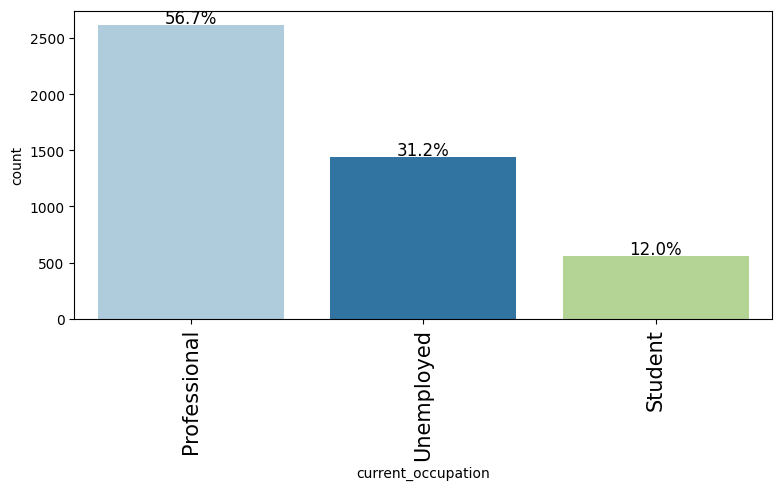

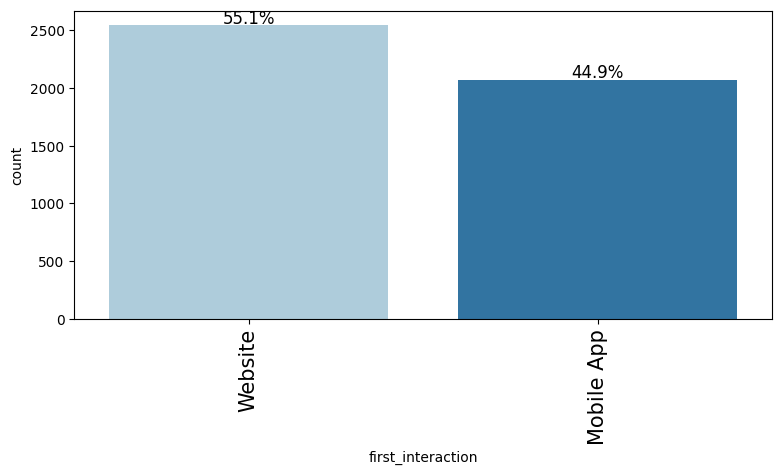

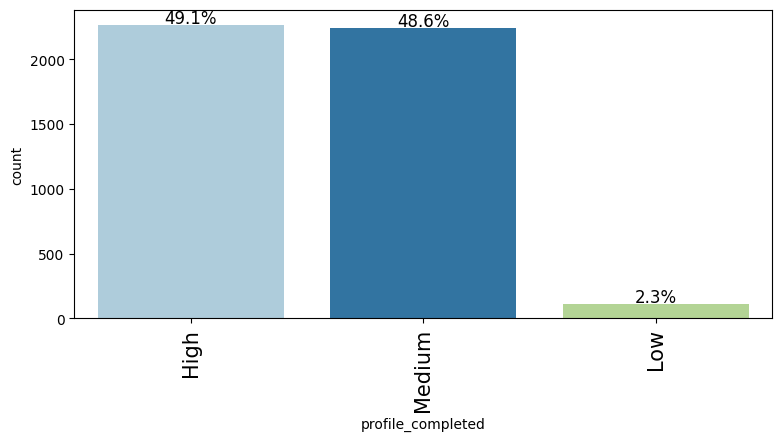

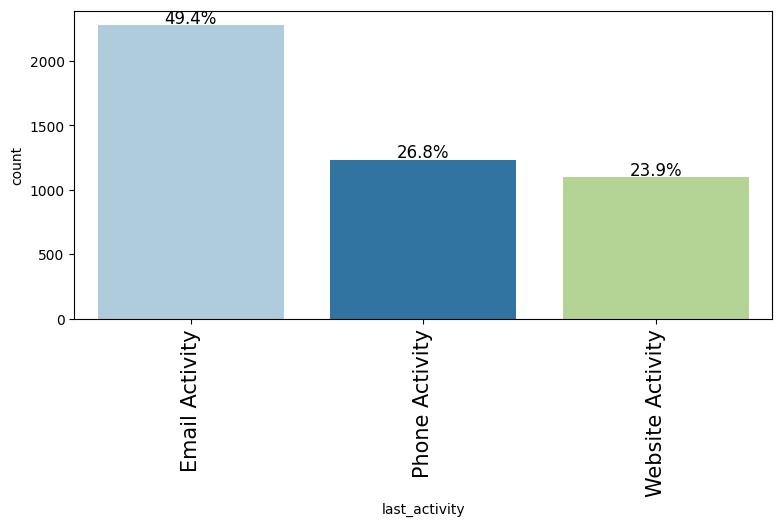

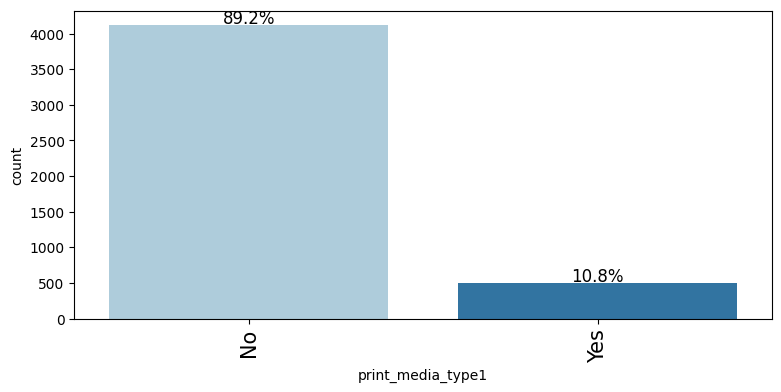

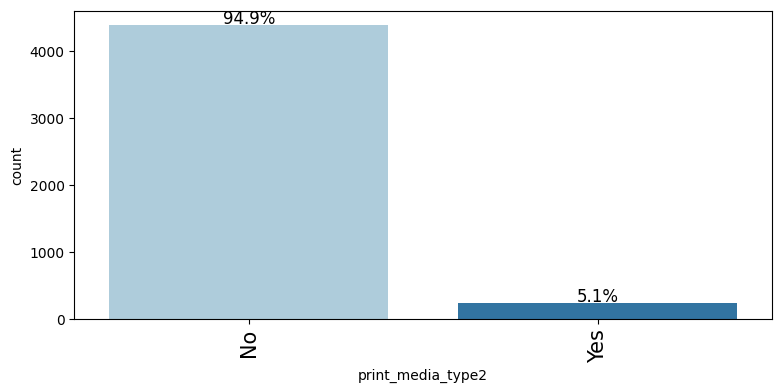

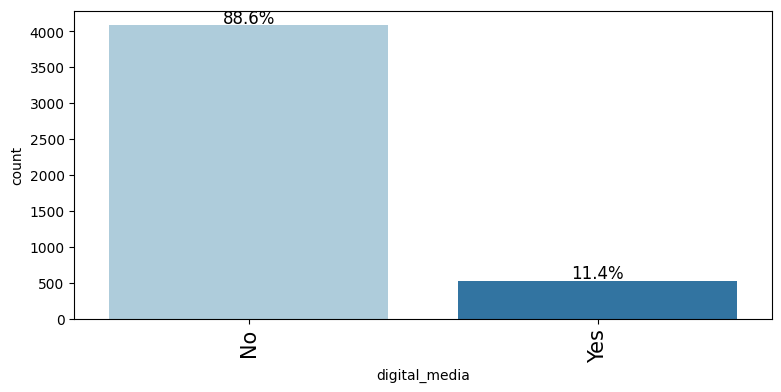

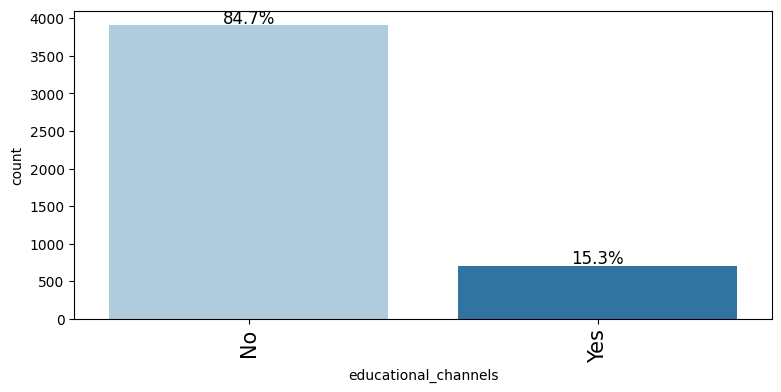

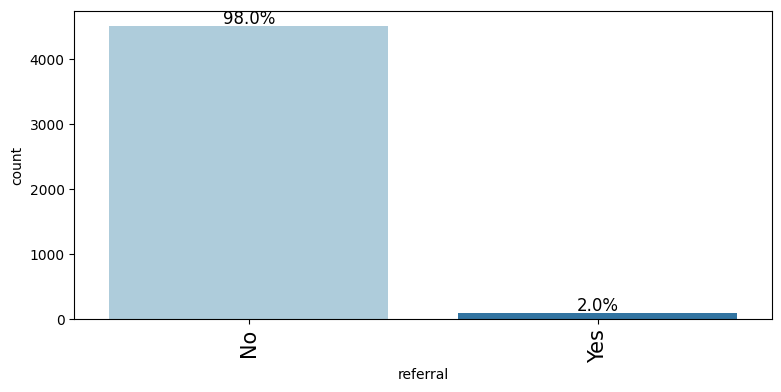

In [21]:
# Exploring all the bar_cols variables and their distributions
for col in cat_cols:
  labeled_barplot( df, col, perc = True )

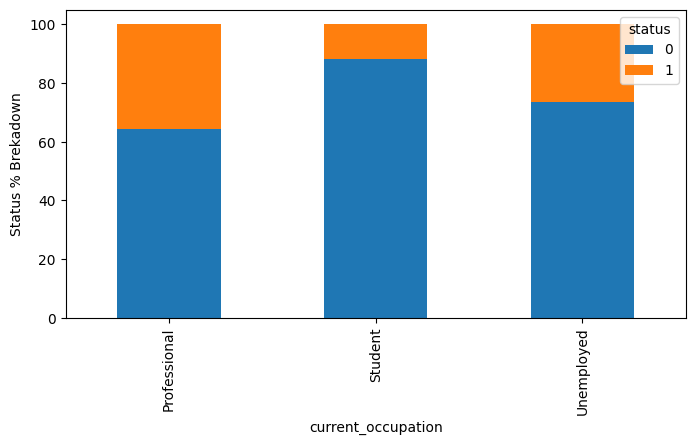

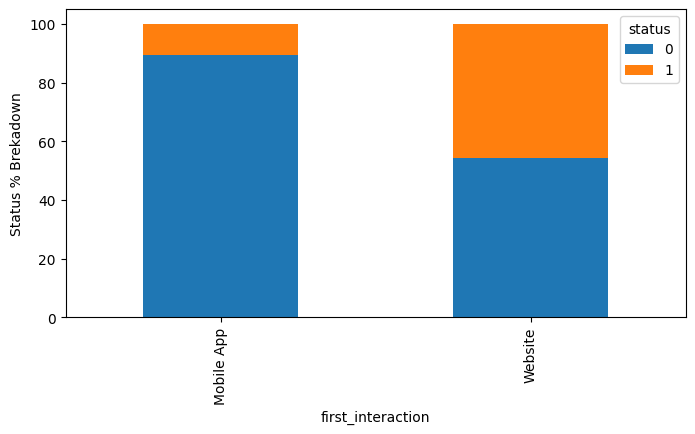

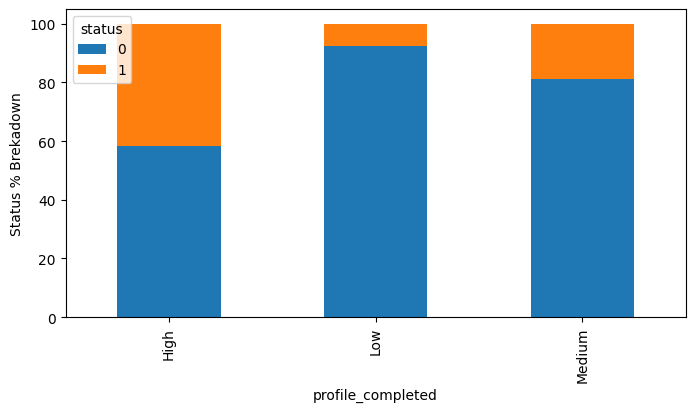

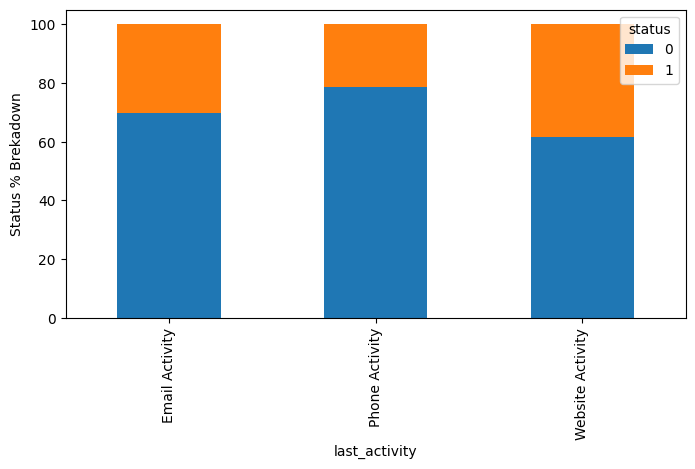

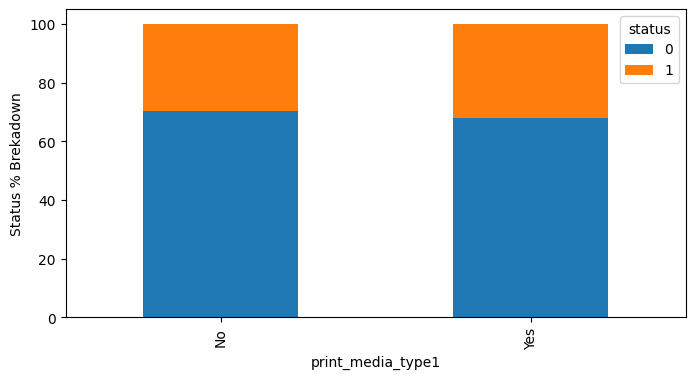

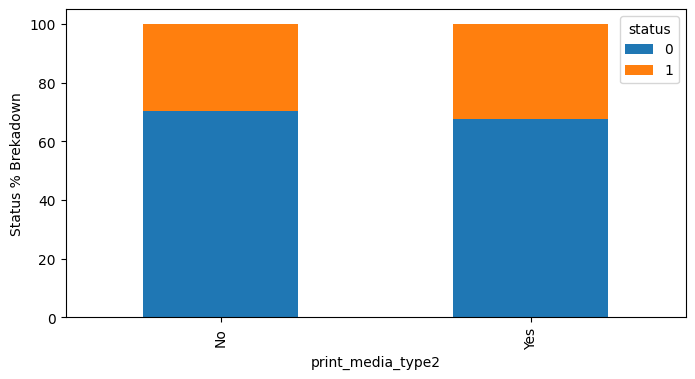

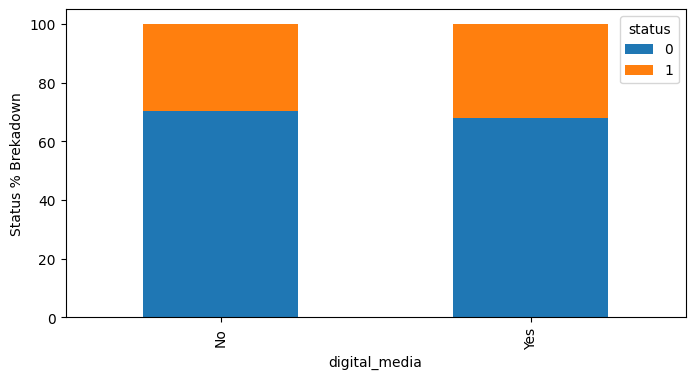

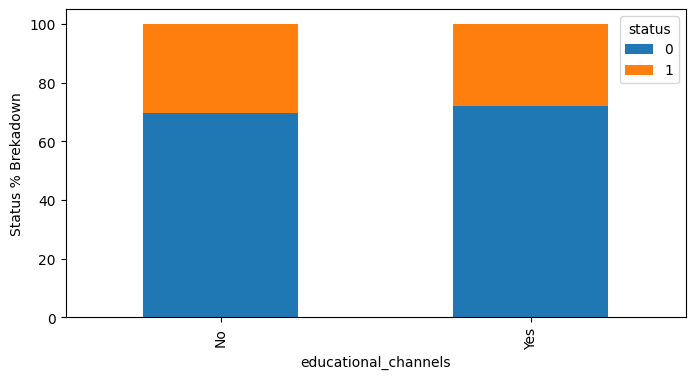

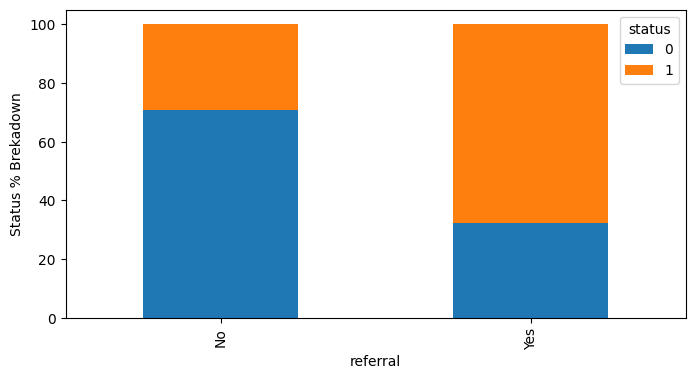

In [22]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Status % Brekadown')

Observations:

- Professionals show the highest conversion rate at almost 40%, followed by Unemployed individuals at approximately 30%.

- Customers whose first interaction was through the Website have the highest conversion rate (50%), compared to just 10% for those coming from the Mobile App.

- Profiles that were 75–100% completed show a conversion rate of 40%, significantly higher than the 20% and 10% for medium and low completion profiles, respectively.

- When the last recorded activity was a Website visit, the conversion rate reached 40%—higher than Email activity (30%) and Phone activity (20%).

- There is no significant difference in conversion rates related to Media Type 1 exposure, both flagged and unflagged users show a 30% conversion rate.
Similarly, Media Type 2, Digital Media, and Educational Channels show only marginal differences in conversion (around 1–3%) between those who had seen the ads and those who hadn’t.

- However, being referred stands out: users who were referred show a conversion rate of nearly 70%, more than double the 30% rate of those who weren’t referred.

Let's check the relationship between status and Numerical variables

In [23]:
#Creating numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols.nunique()

5

In [24]:
# Mean of numerical variables grouped by status
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
status,,,,,
0,45.153014,3.578980,577.420711,3.025732,0.0
1,48.663762,3.538126,1068.397967,3.027050,1.0


**Observations:**
- Leads that have been converted into customer have spent the double of time on the website and have been referred.


🎯 Target Customer Summary – Key Conversion Insights
The most likely customers to convert share several key traits:

- They are Professionals, the occupation group with the highest conversion rate (40%), secondly unemployed looking to increase their skillsets.

- Their first interaction is typically through the Website, which has the strongest conversion performance (50%), far surpassing the Mobile App.

- They tend to have well-completed profiles, with 75–100% completion correlating with a 40% conversion rate.

- Referred leads: referred customers show an impressive 70% conversion rate, more than double that of non-referred customers.

These findings suggest that the most effective strategies to boost conversion include driving high-quality traffic to the website, encouraging profile completion, and leveraging referral programs.



### Let´s heck the relationship between different numerical variables

<Axes: >

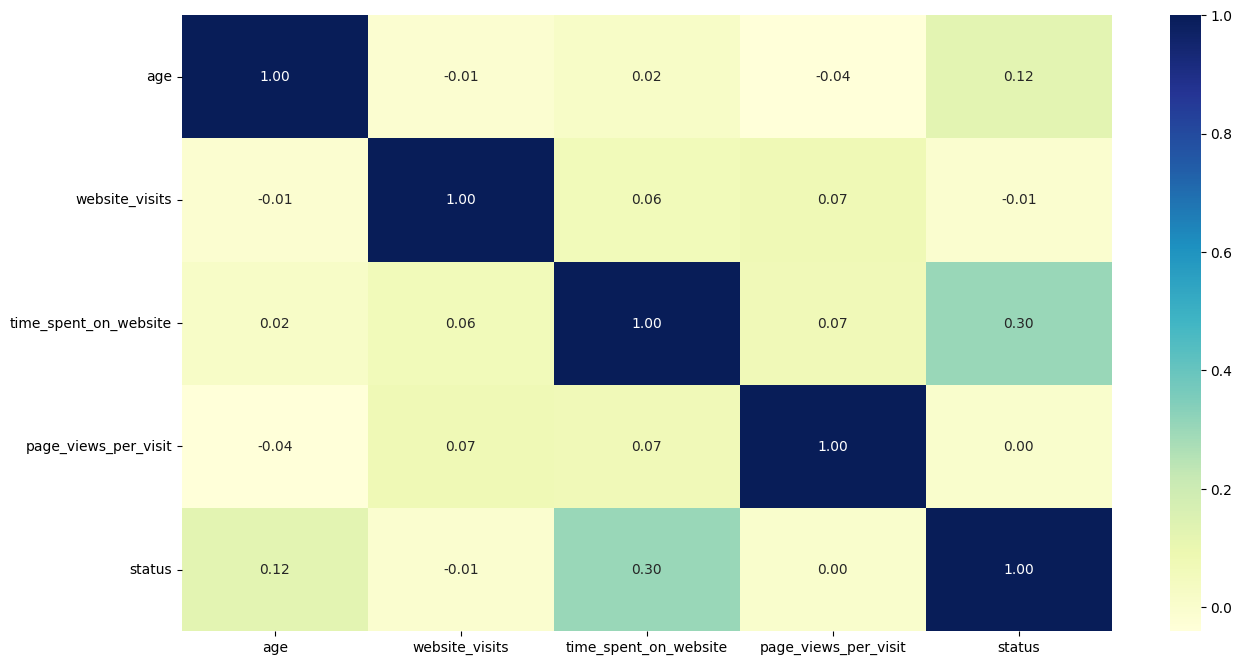

In [25]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Observation:
- We can confirm that only the time spent on the website shows a low but positive correlation with the target status. The other variables do not exhibit any meaningful correlation.

## Data Preprocessing

- Missing value treatment (if needed) (N/A)
- Feature engineering (if needed) (Binary int variables to object)
- Outlier detection and treatment (N/A)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Let´s tranform the numerical binary variables to object for our classification model

In [26]:
# binary columns review
cols_bin = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for col in cols_bin:
    print(f"{col}: {df[col].unique()}")


print_media_type1: ['Yes' 'No']
print_media_type2: ['No' 'Yes']
digital_media: ['Yes' 'No']
educational_channels: ['No' 'Yes']
referral: ['No' 'Yes']


In [27]:
# changing binary columns
for col in cols_bin:
    df[col] = df[col].str.strip().str.capitalize().map({'Yes': 1, 'No': 0})

In [28]:
# Reviewing binary  columns transformation
for col in cols_bin:
    print(f"{col}: {df[col].unique()}")

print_media_type1: [1 0]
print_media_type2: [0 1]
digital_media: [1 0]
educational_channels: [0 1]
referral: [0 1]


In [29]:
#Creating numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols.nunique()


10

In [30]:
#Creating categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols.nunique()


4

## Model Building
We will encode the categorical features, to build a model.
Then the independent variables and dependent variables will be separated.
We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [31]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
encode_df = pd.get_dummies(df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [32]:
#reviewing encoded df
encode_df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,False,True,True,False,False,False,True
1,56,2,83,0.320,0,0,0,1,0,0,False,False,False,False,True,False,True
2,52,3,330,0.074,0,0,1,0,0,0,False,False,True,False,True,False,True
3,53,4,464,2.057,0,0,0,0,0,1,False,True,True,False,False,False,True
4,23,4,600,16.914,0,0,0,0,0,0,True,False,True,False,False,False,False


### Separating the independent variables (X) and the dependent variable (y)

In [33]:
# Separating target variable and other variables
X= encode_df.drop(columns = ['status'])
y= encode_df.status


In [34]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print(X_train.shape , X_test.shape)

(3228, 16) (1384, 16)


### Scaling the data

In [35]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [36]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Building the model

We will be building 4 different models:

- Logistic Regression
- Support Vector Machine(SVM)
- Decision Tree
- Random Forest

Model evaluation criterion
The model can make two types of wrong predictions:

- Predicting a customer will convert and the customer doesn't convert.(False Positive)
- Predicting a customer will not convert and the customer converts.(False Negative)

Which case is more important?

Predicting that a customer will convert but they don’t is a False Positive, which wastes resources.
To reduce this, we want to maximize Precision, which helps ensure that when the model predicts a customer will convert, it’s highly likely to be correct.
This minimizes wasted effort on low-potential leads and focuses resources on those more likely to convert.

### Logistic Regression

In [37]:
# Fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

#### Logistic Regression Performance

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2264
           1       0.73      0.64      0.68       964

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



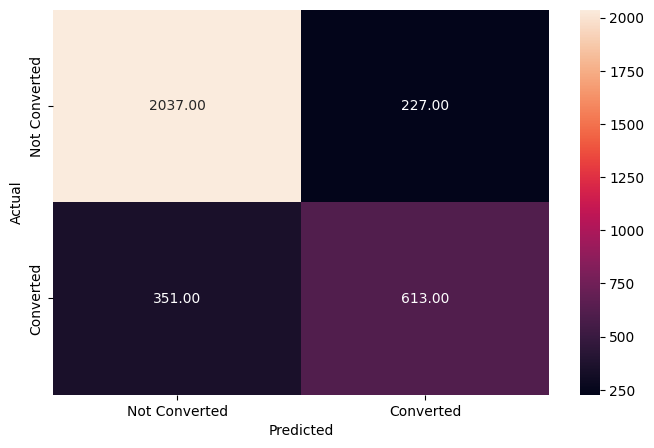

In [38]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

Reading the confusion matrix (clockwise):

- True Negative (Actual=0, Predicted=0): Model predicts that a customer would not convert and the customer does not convert

- False Positive (Actual=0, Predicted=1): Model predicts that a customer would convert but the customer does not convert

- False Negative (Actual=1, Predicted=0): Model predicts that a customer would not convert but the customer converts

- True Positive (Actual=1, Predicted=1): Model predicts that a customer would convert and the customer converts

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       971
           1       0.75      0.63      0.69       413

    accuracy                           0.83      1384
   macro avg       0.80      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



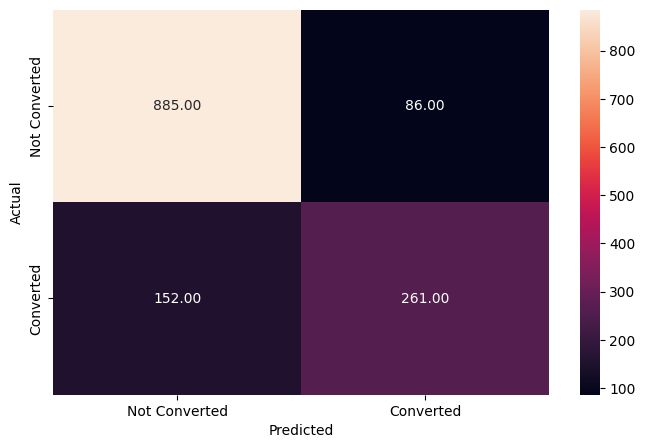

In [39]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

Observations:

- We are getting an accuracy of around 82% on train and test dataset.
- However, the precision for this model is only around 75% for class 1 on train and test dataset.
As the precision adn recall can be better, we will keep trying with other models to see if the performance can increase to have a better prediction on which customers will convert.

Let's check the coefficients and find which variables are leading to the customers convertion

In [40]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
first_interaction_Website,1.300504
time_spent_on_website,0.865100
last_activity_Website Activity,0.248775
referral,0.201818
age,0.079180
educational_channels,0.042210
print_media_type2,0.032297
digital_media,0.025240
print_media_type1,0.024740
page_views_per_visit,-0.036642


Observations:

Features which positively affect on the attrition rate are:

- first_interaction_Website
- time_spent_on_website
- last_activity_Website Activity
- referral

Features which negatively affect on the attrition rate are:

- profile_completed_Medium
- current_occupation_Student
- profile_completed_Low
- last_activity_Phone Activity
- current_occupation_Unemployed

Observations:

Based on the Logistic Regression model, first_interaction_Website is the most important feature in detecting whether a customer would convert or not. So, the highest convertion is among the customers whose first interaction was via the website.
This means that the Marketing team can create a strategy to push and improve the Website traffic to increase the conversion.

This model also suggests that conversion is dependent on the customers' website activity. The more time the customer spent on the website higher is the convertion potential.

The model also suggests that customer with current occupation equals Student or Unemployed, are less probably to convert. Also if they have a Medium profile completed.

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [41]:
# Finding the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = False)

,odds
first_interaction_Website,3.671148
time_spent_on_website,2.375242
last_activity_Website Activity,1.282454
referral,1.223625
age,1.082399
educational_channels,1.043113
print_media_type2,1.032825
digital_media,1.025562
print_media_type1,1.025048
page_views_per_visit,0.964021


Observations

- The odds of a customers converting after having  their first_interaction_Website are 3.6 times the odds of one who is hasnt.
- The odds of a customer converting after having spent time on the website is 2.3 times in comparision with customers that hasnt spent time in the website.  

This can mean that the customer who visited the Website and then spent time looking for the corresponding information, gather all the information they need to take a decision and turn into a customer.

#### Precision-Recall Curve for Logistic Regression

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

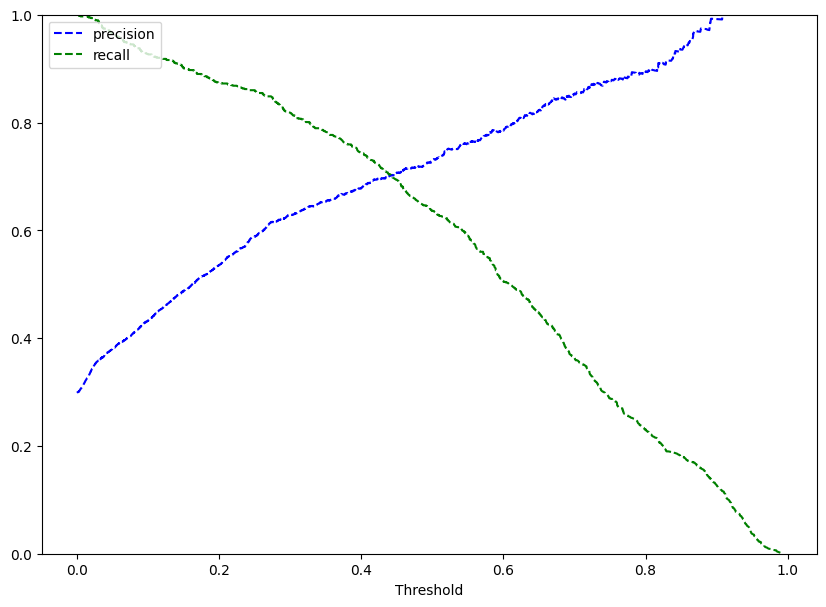

In [42]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [43]:
for i in np.arange(len(thresholds_lg)):
  if precisions_lg[i] == recalls_lg[i] :
    print(thresholds_lg[i])

0.4416935999542943


Observation:

- We can see that precision and recall are balanced for a threshold of about ~0.44.

Let's find out the performance of the model at this threshold

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2264
           1       0.70      0.70      0.70       964

    accuracy                           0.82      3228
   macro avg       0.79      0.79      0.79      3228
weighted avg       0.82      0.82      0.82      3228



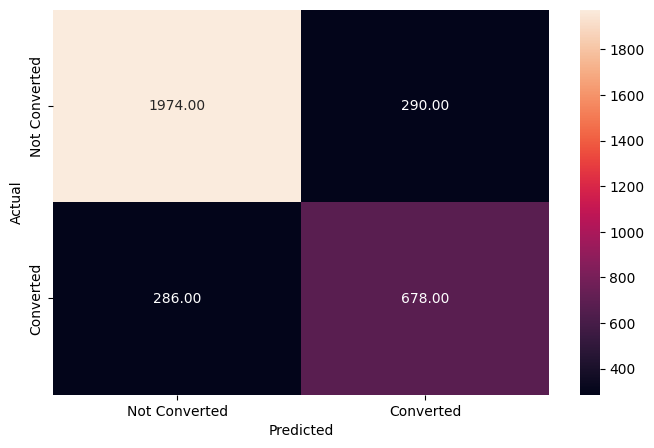

In [44]:
optimal_threshold=.44
y_pred_train = lg.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       971
           1       0.71      0.69      0.70       413

    accuracy                           0.83      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.82      0.83      0.83      1384



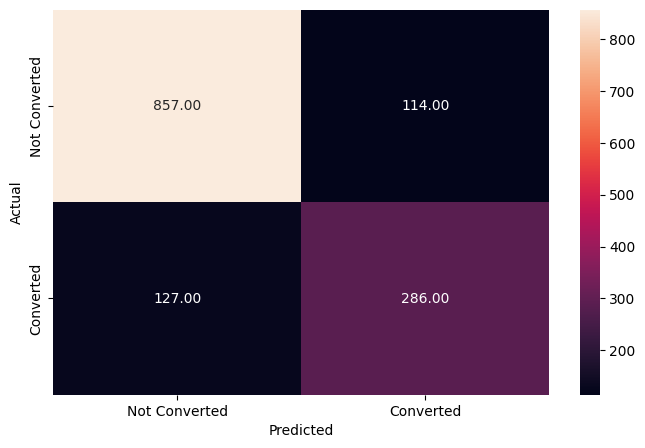

In [45]:
optimal_threshold=.44
y_pred_test = lg.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

Observation:

- The model is giving a similar performance on the test and train data i.e. the model is giving a generalized performance.
- The recall of the test data has increased  while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
The average recall and precision for the model are good but let's see if we can get better performance using other algorithms.

### SVM
Support Vector Machines

In [46]:
# To Speed-Up SVM training.

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1. Linear Kernel
2. RBF Kernel

Linear Kernel

In [47]:
# Fitting SVM
svm = SVC(kernel = 'linear') # Linear kernel or linear decision boundary
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2264
           1       0.72      0.68      0.70       964

    accuracy                           0.82      3228
   macro avg       0.79      0.78      0.79      3228
weighted avg       0.82      0.82      0.82      3228



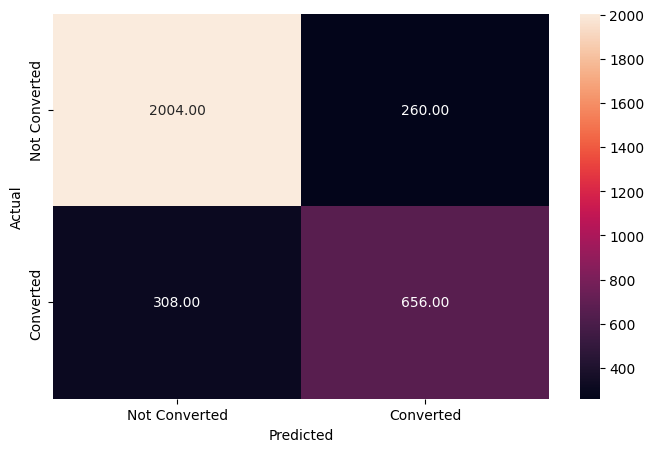

In [48]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       971
           1       0.73      0.68      0.70       413

    accuracy                           0.83      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.83      0.83      0.83      1384



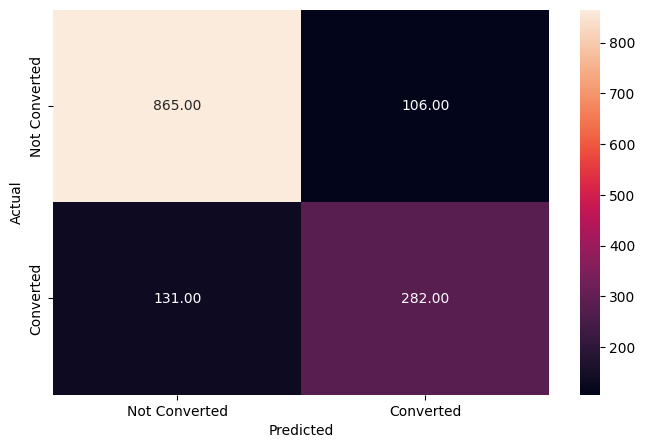

In [49]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

Observations:
- SVM model with linear kernel is not overfitting as the accuracy is around 82% for both train and test dataset.
- Recall and Precision are quite good for class 1  around 72%, similar as the Logistic Regression Model

Let´s keep looking for a better Model

RBF Kernel

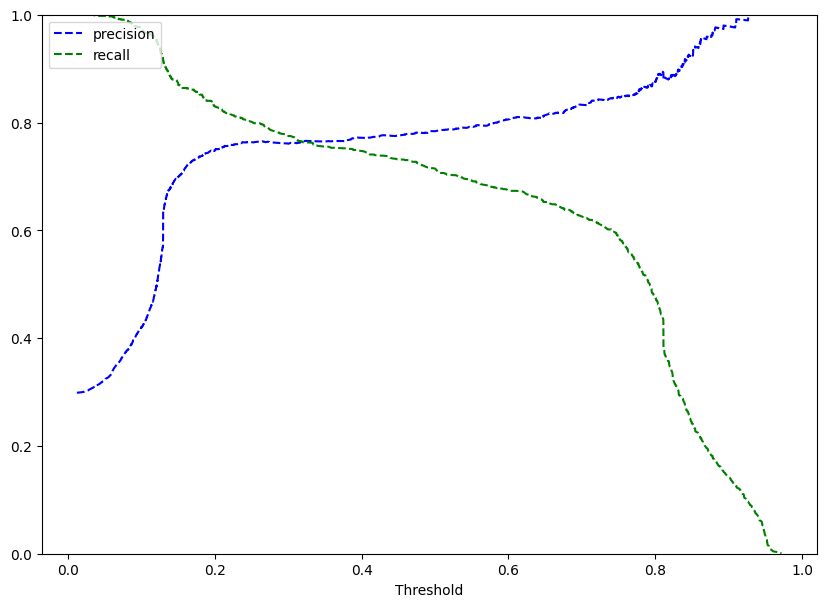

In [50]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [51]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.3196859240313865


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2264
           1       0.76      0.76      0.76       964

    accuracy                           0.86      3228
   macro avg       0.83      0.83      0.83      3228
weighted avg       0.86      0.86      0.86      3228



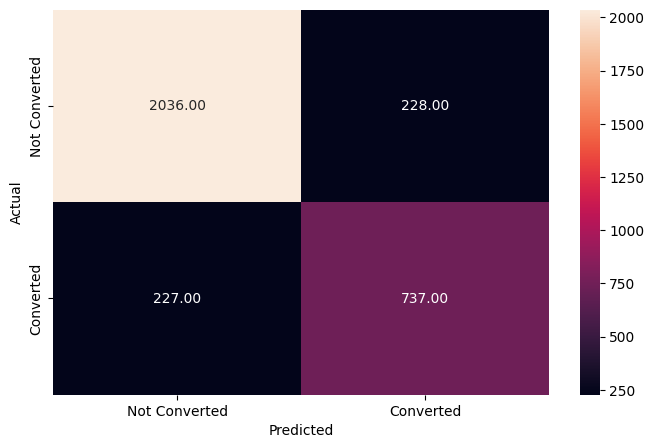

In [52]:
optimal_threshold1=0.318
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       971
           1       0.72      0.71      0.72       413

    accuracy                           0.83      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



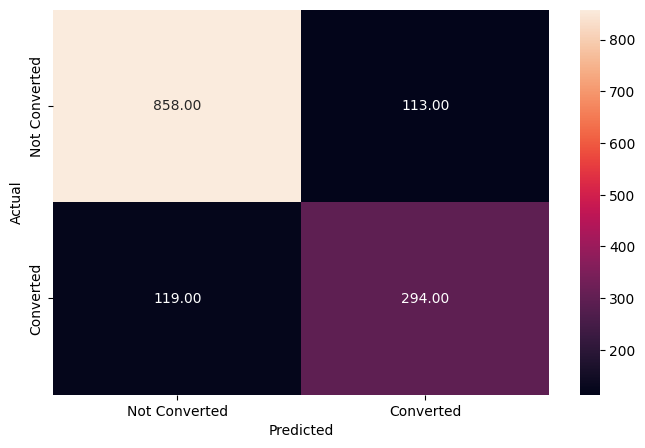

In [53]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

Observations:

- At the optimal threshold of .318, the model performance has improved significantly. The recall has improved from 0.68 to .76 in the train dataset which is a ~8% increase and the model is giving good generalized results.
- Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
- In generall the Precision and Recall have similar performance as the other models, hence we will keep looking for a better one.

### Decision Tree model

In [54]:
# Building decision tree model
model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

Let's check the model performance of decision tree

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



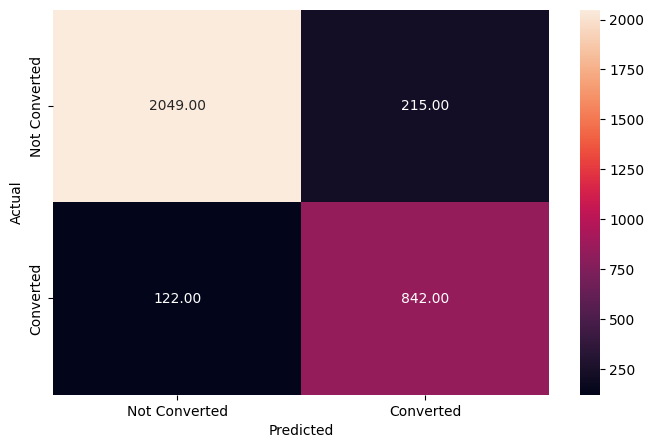

In [55]:
# Checking performance on the training dataset
y_train_pred_dt = model_dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



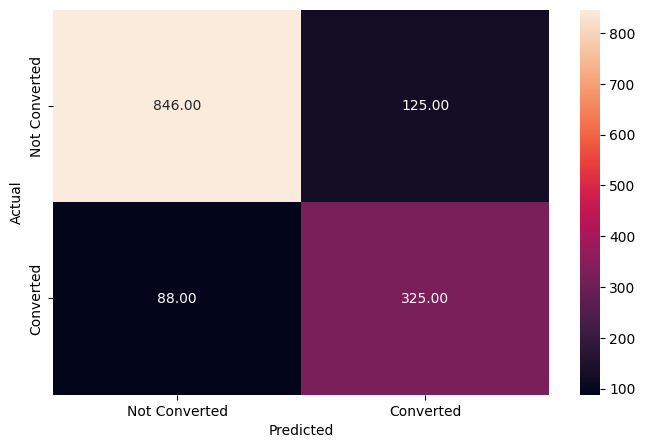

In [56]:
# Checking performance on the test dataset
y_test_pred_dt = model_dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

Observations:

- Model has performed very well on the training and test test, improving the performance in Recall and Precision , in comparison with the previous models.

Let´s visualize the decision tree and observe the decision rules, and then choose if a tune of the hyperparameters to avoid overfitting is needed.


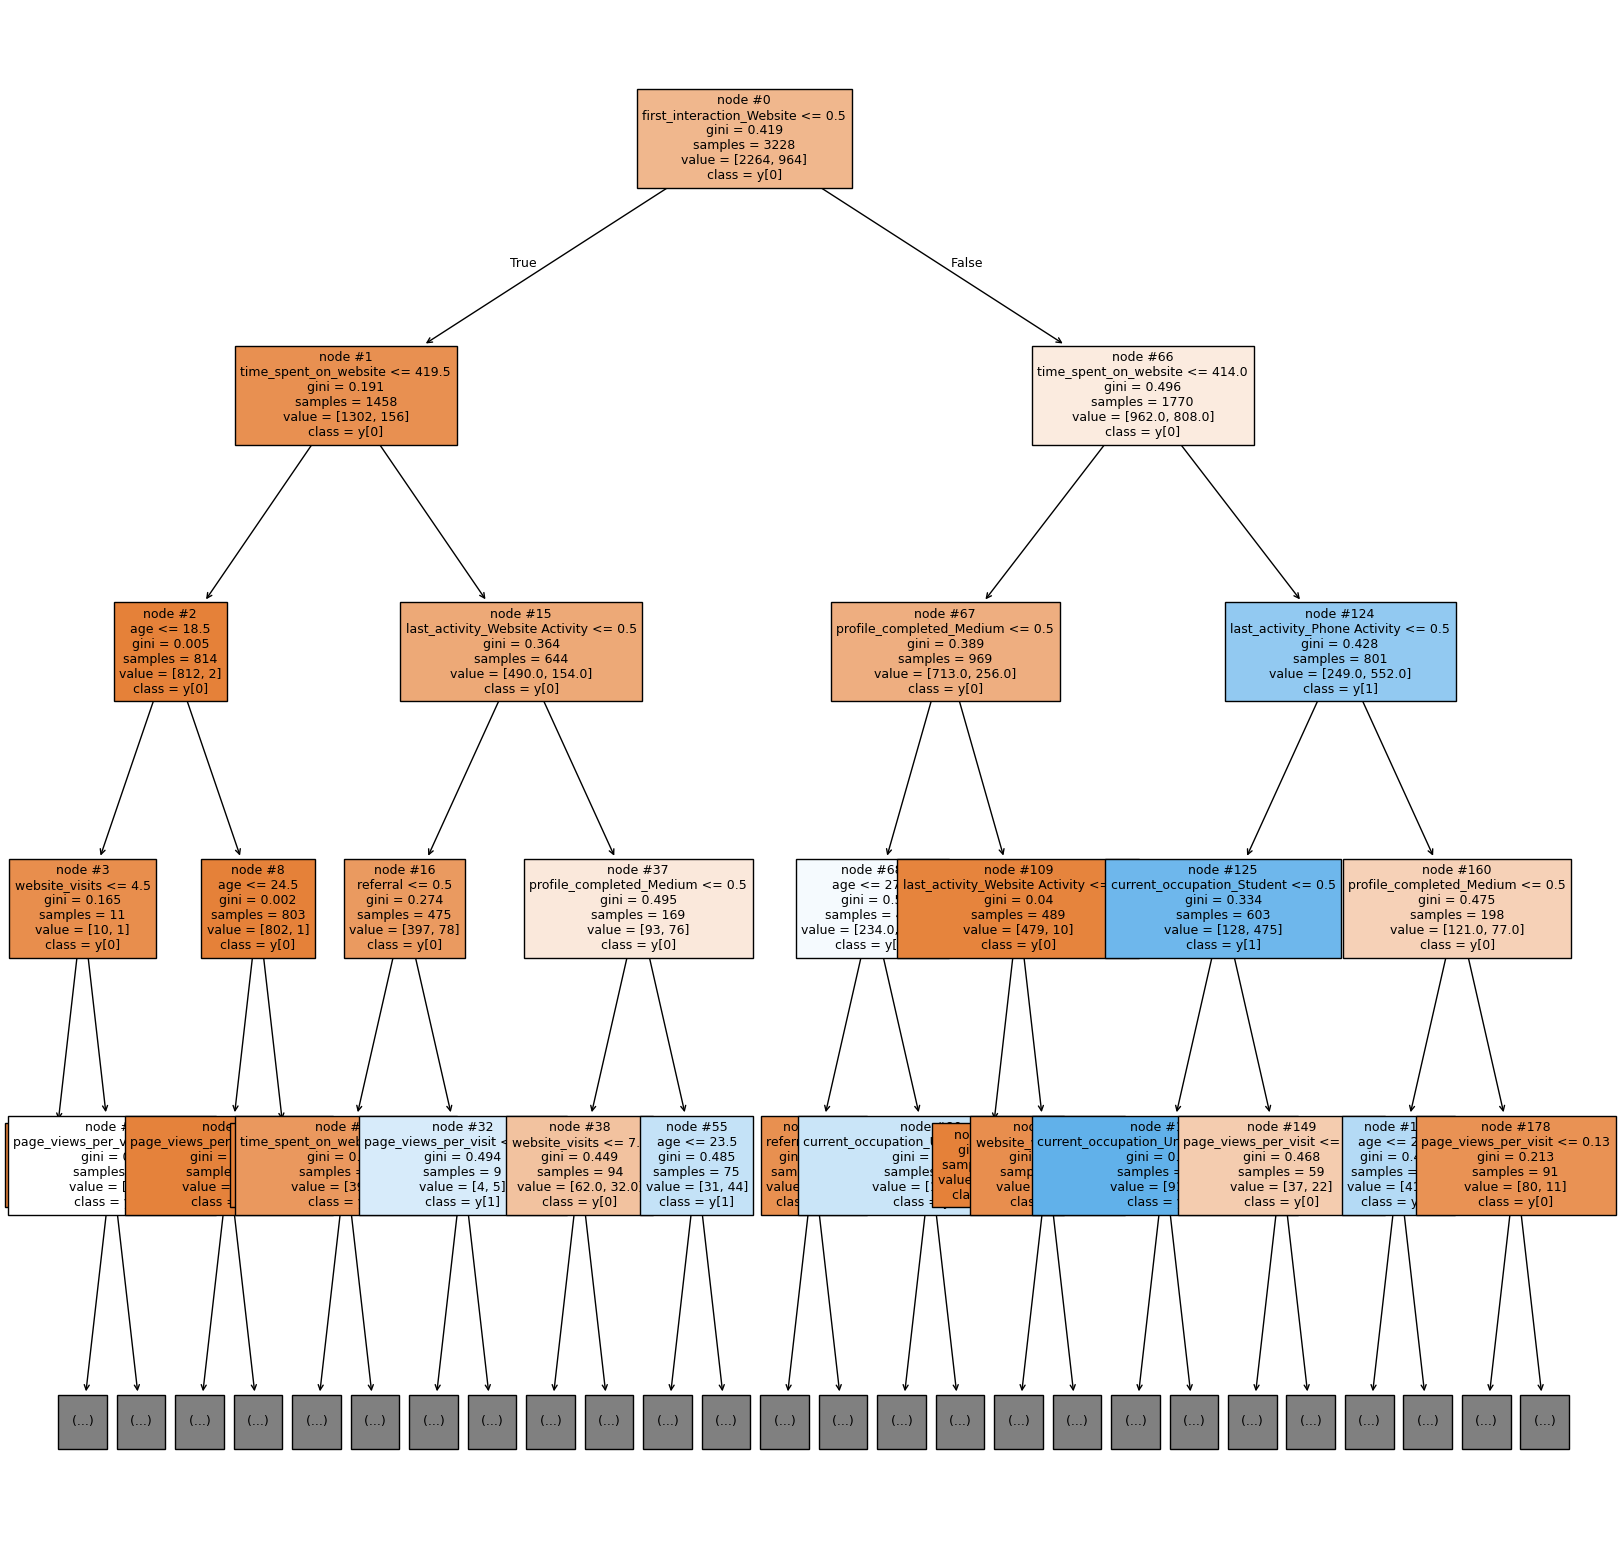

In [57]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

Let's plot the feature importance and check the most important features.

<Axes: xlabel='Importance', ylabel='None'>

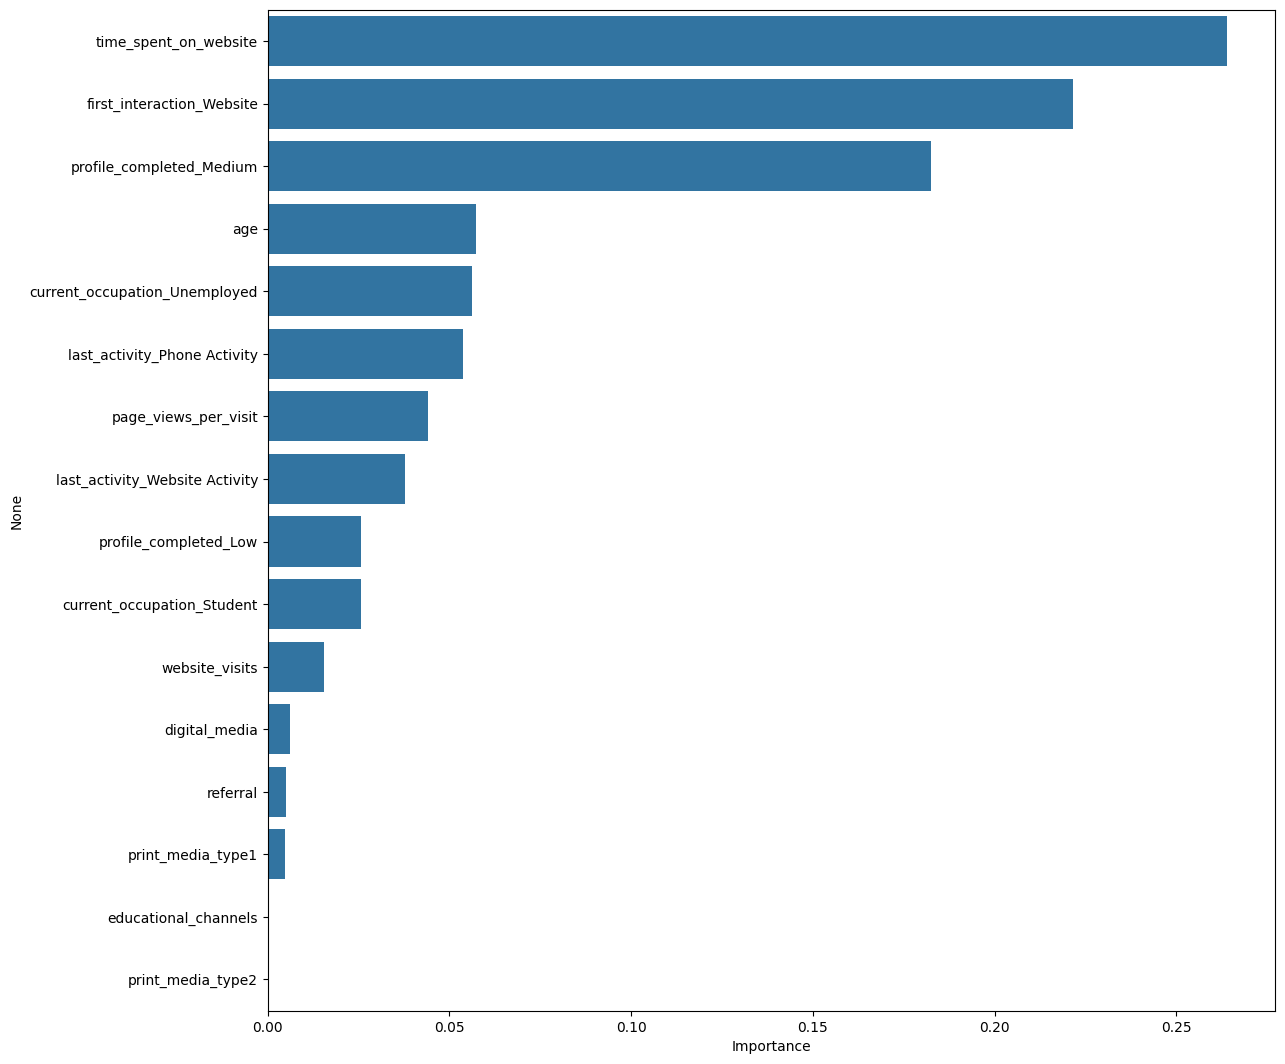

In [58]:
# Plot the feature importance

importances = model_dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

Observation:

- time_spent_on_website is the most important feature followed by first_interaction_website and profile_completed_medium which makes sense, and confirms our previews EDA observations. Customers who have a first interaction with the Website and spent a long time on it,show a high engagement and are able to gather all the information needed to take a decision and convert into a customer.


### Random Forest

In [59]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



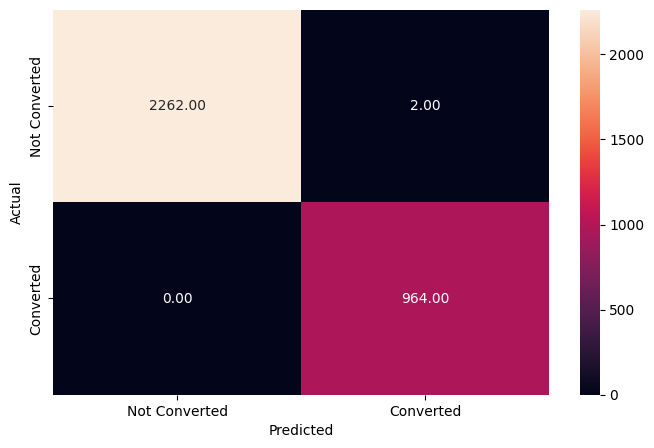

In [60]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

Observation:

- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.79      0.74      0.77       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.86      0.86      1384



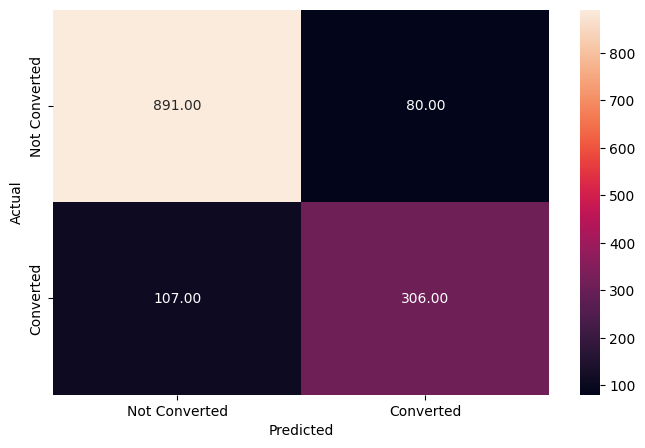

In [61]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Observations:

- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.75 for class 1.
- Precision is high for the test data as well in comparison with the other models

Let's check the feature importance of the Random Forest

<Axes: xlabel='Importance', ylabel='None'>

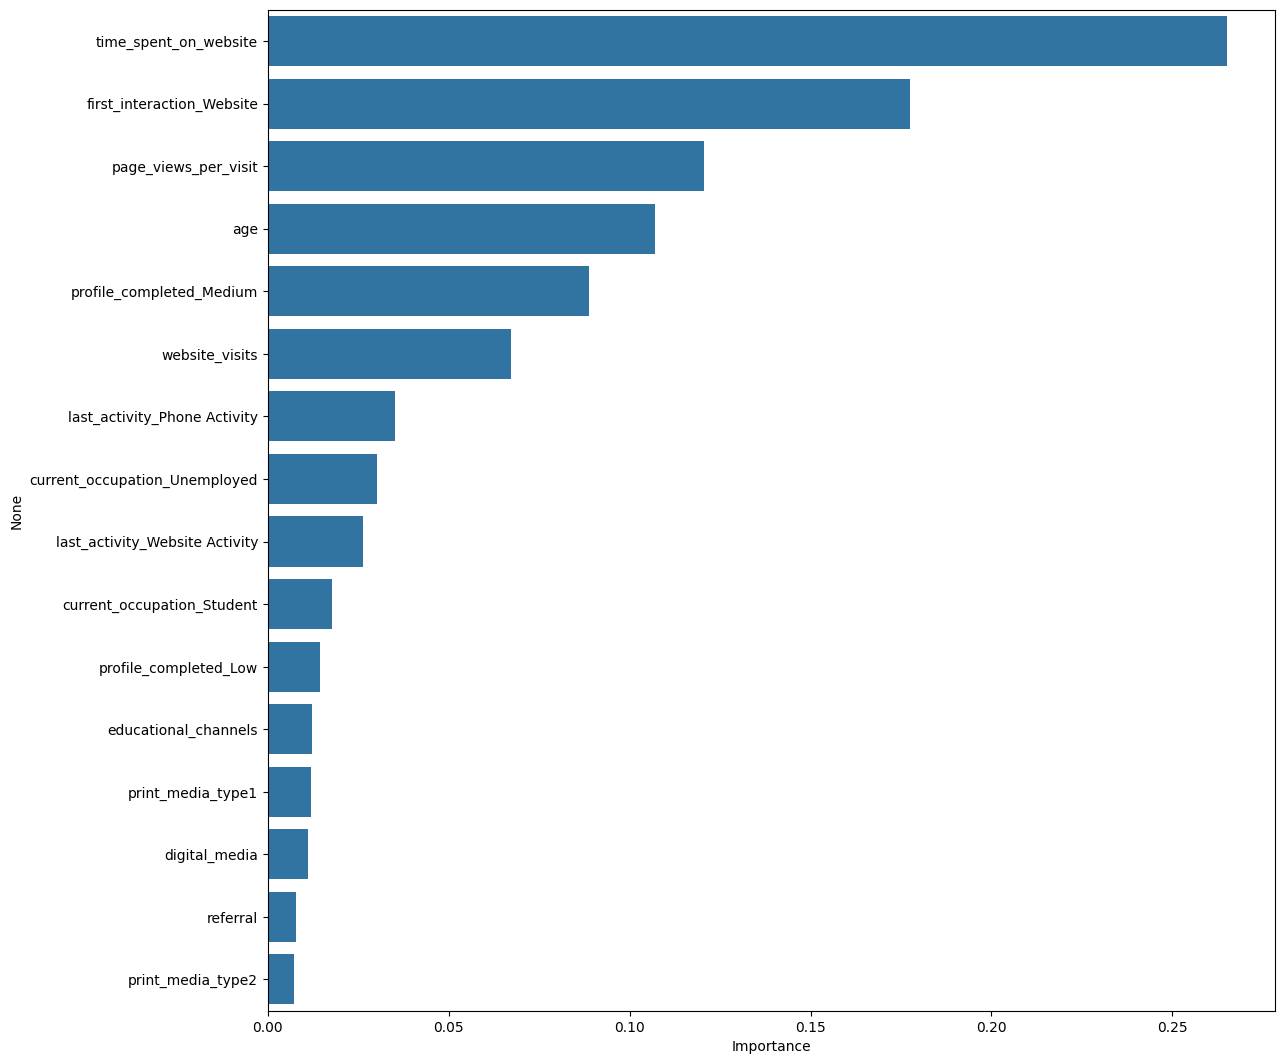

In [62]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

Observations:

- The Random Forest verifies the results from the decision tree that the most important features are time_spent_on_website and first_interaction_website.

### Tuning
We will tune Decision Trees and Random Forest models to see if performance improves. For tuning, we will only use Grid Search.

In [63]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(11), max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2264
           1       0.81      0.83      0.82       964

    accuracy                           0.89      3228
   macro avg       0.87      0.88      0.87      3228
weighted avg       0.89      0.89      0.89      3228



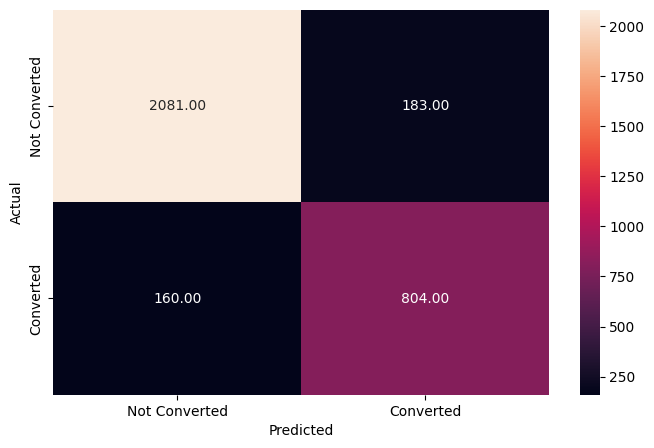

In [64]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       971
           1       0.75      0.77      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.85      1384



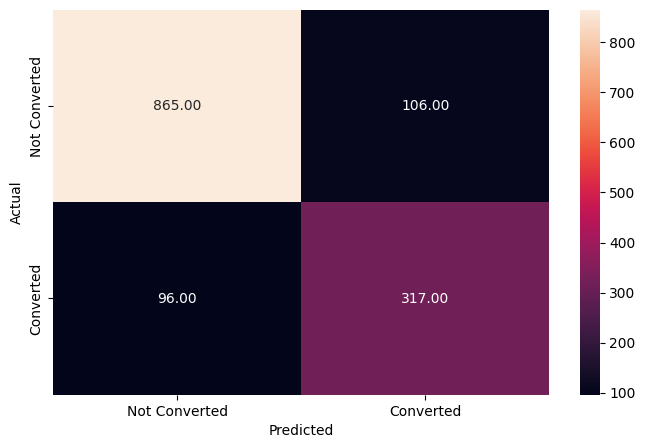

In [65]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Observation:

In comparison to the model with default values of hyperparameters, the performance on the training and test set has gone down significantly. This makes sense because we are trying to reduce overfitting, but we are still having a good accuracy 0.85

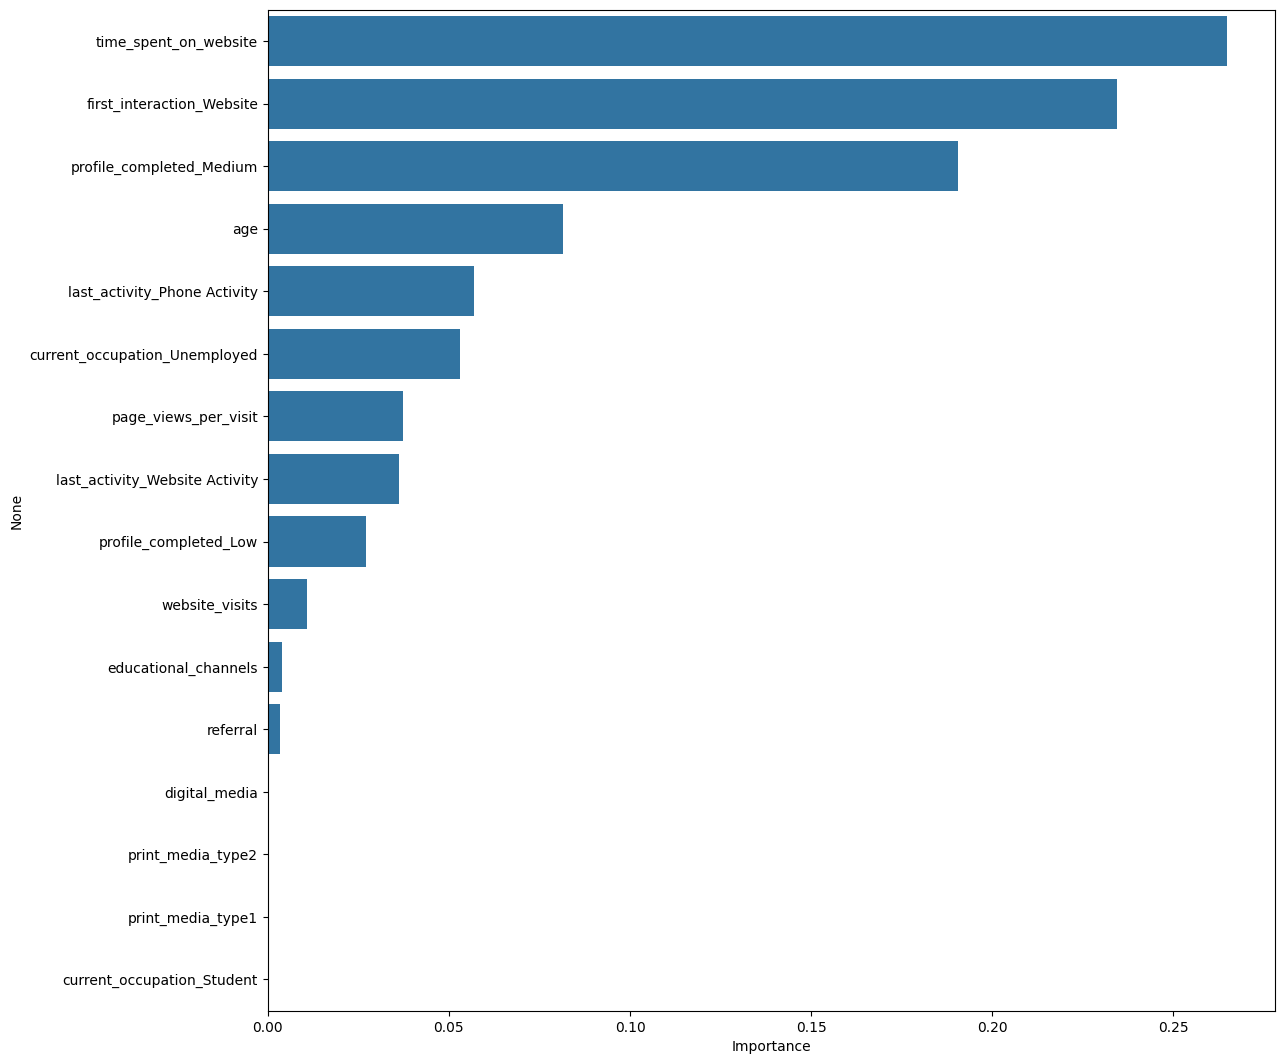

In [66]:
importances = estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

And the most important features remain the same for the decision tree model.

In [67]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2264
           1       0.85      0.99      0.92       964

    accuracy                           0.95      3228
   macro avg       0.92      0.96      0.94      3228
weighted avg       0.95      0.95      0.95      3228



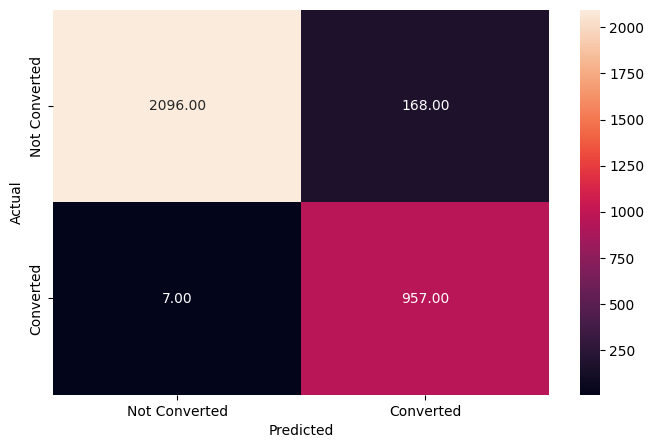

In [68]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       971
           1       0.71      0.79      0.75       413

    accuracy                           0.84      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.84      0.84      1384



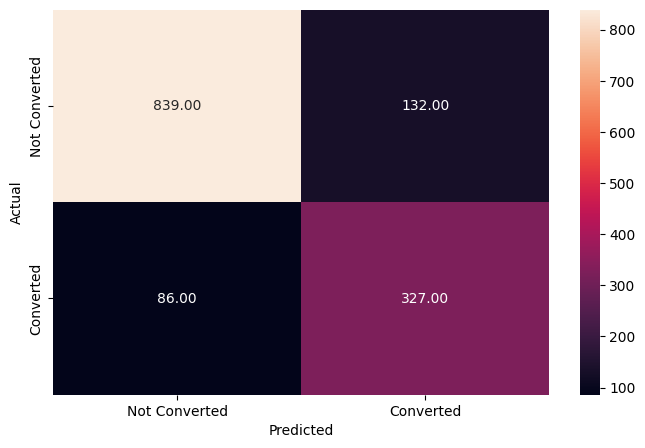

In [69]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

<Axes: xlabel='Importance', ylabel='None'>

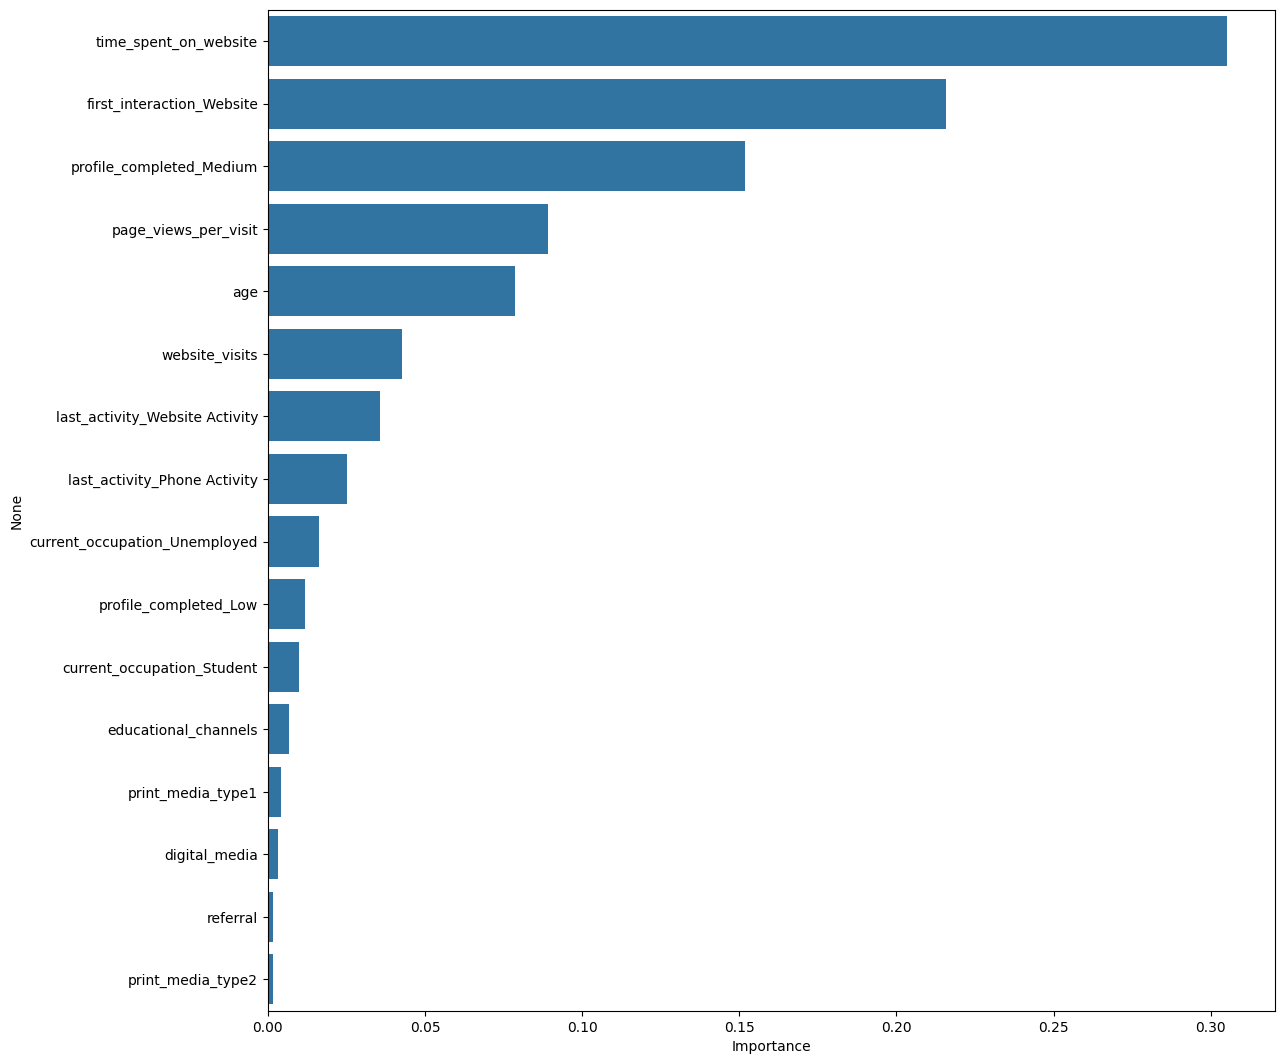

In [70]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

Conclusion:
- The tuned decision tree has outperformed other models and provided balanced metrics.
- We have been able to build a predictive model that can be used to predict the leads who are likely to convert into new customers with a precision of 0.71 and a recall of 0.79 having an accuracy of 0.84

## Actionable Insights and Recommendations

We have been able to build a predictive model:

a) that companies can deploy to identify potential customers .

b) that companies can use to improve their marketing strategies.

c) and that companies can use to cutomize their websites according to their target customers.

Factors that drive customers conversion - first_interaction_website,
profile_completed ,time_spent_on_website, page_views_per_visit

first_interaction_website: if the first interaction of a customer is via Website, this can mean that the customer is already looking for a place to get educational offers. So the potential to convert that lead is high.

profile_completed: Customers with a medium or high profile completed mean that the lead is engaged and indeed is ready to buy.

time_spent_on_website and page-views_per_visit: more time spent on the website,means more pages viewd, meaning that the customer is reading all the information and perhaps looking for offers or comparing the content with other companies. More time spent means that the customer is interested and ready to buy. And that perhaps needs only a call or human interaction to take the final decision.



### Five strategic insight-driven recommendations for the company:

1. Prioritize Website Engagement Channels

  Insight: Customers whose first interaction is via the website have a higher conversion likelihood.

  Action:
  - Invest in improving website SEO and digital presence to attract more organic and paid traffic.   
  - Prioritize the website as the primary touchpoint in marketing campaigns.

2. Encourage Profile Completion for Better Lead Quality

  Insight: Leads with medium or high profile completion show greater engagement and readiness to convert.

  Action:
  - Introduce incentives (e.g., early access to content, discounts) for users to complete their profiles.
  - Use progressive profiling to simplify and encourage profile completion.

3. Target Leads with High Web Activity for Sales Follow-Up

  Insight: Leads spending more time on the website and viewing more pages are close to making a purchase decision.

  Action:
  - Use behavioral data to score leads and flag high-engagement users for timely outreach by the sales team.
  - Deploy personalized CTAs or chatbots after certain time thresholds are reached on the website.

4. Reevaluate and Optimize Ad Campaigns

  Insight: Ad exposure has a low impact on customer conversion.

  Action:
  - Audit current ad creatives, targeting, and placement for effectiveness.
  - A/B test stronger value propositions and clearer calls-to-action.
  - Reallocate part of the budget toward organic content or channels with higher conversion performance.

5. Personalize Website Experience Based on Lead Behavior

 Insight: Website activity signals strong intent to buy.

 Action:
  - Use ML model outputs to dynamically tailor homepage offers, testimonials, or content based on lead score.
  - Highlight product benefits, comparisons, or limited-time offers for high-scoring leads.




